# Quantum Electrodynamics vacuum polarization solver
Thomas E Grismayer et al 2021 New J. Phys. in press https://doi.org/10.1088/1367-2630/ac2004

In [2]:
import numpy as np
from numpy import pi, sin, cos, sqrt, exp
import matplotlib.pyplot as plt

# Figure 3

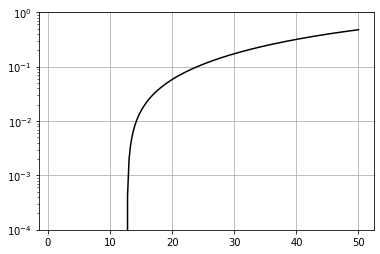

In [22]:
Deltax = pi/100
Deltat = 0.98 * Deltax
xiE02 = 1e-4

def w(k):
    return 1/Deltat * np.arccos( 1+(Deltat/Deltax)**2 *(cos(k*Deltax)-1) )

def eq12(k):
    return 1 - sin(k*Deltax/2)**2 / sin(w(k)*Deltat/2)**2 * cos(k*Deltax/2)**2

klst = np.linspace(1,50,200)
ylst = eq12(klst)

plt.plot(klst,ylst,'k-')
plt.grid()
plt.yscale('log')
plt.ylim([1e-4,1e0])
plt.show()

# Figure 5

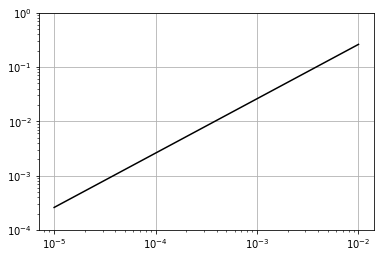

In [24]:
Deltax = 0.0314
Deltat = 0.98 * Deltax
eps = 1- Deltat/Deltax

xiE02lst = np.logspace(-5,-2,200)

plt.plot(xiE02lst,2*xiE02lst*sqrt(8*eps)/Deltat,'k-')
plt.grid()
plt.xscale('log')
plt.yscale('log')
plt.ylim([1e-4,1e0])
plt.show()

# Figure 7

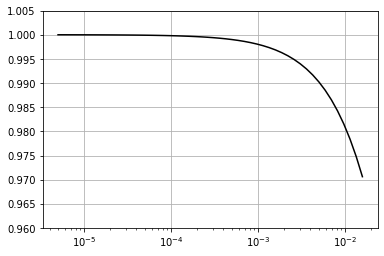

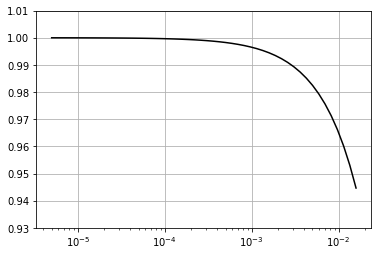

In [22]:
def npll(xiEs2):
    """eq (17)"""
    return sqrt( (1+6*xiEs2)/(1+2*xiEs2) )
def nprp(xiEs2):
    """eq (18)"""
    return sqrt( (1+2*xiEs2)/(1-5*xiEs2) )

xiEs2lst = np.logspace(-5.3,-1.8)
plt.plot(xiEs2lst,1/npll(xiEs2lst),'k-')
plt.grid()
plt.xscale('log')
plt.ylim([0.96,1.005])
plt.show()

plt.plot(xiEs2lst,1/nprp(xiEs2lst),'k-')
plt.grid()
plt.xscale('log')
plt.ylim([0.93,1.01])
plt.show()

# Figure 9

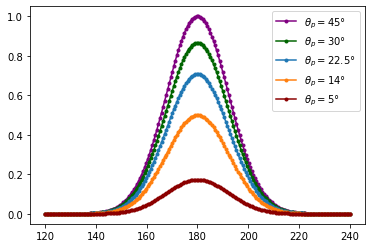

In [30]:
def b(y,thp):
    """eq 25"""
    #thp = pi/4
    yp = 180* 4.78/30;
    y0 = yp
    lbdp = 0.01 #[\mu m]
    lbd0 = 1.0 #[\mu m]
    W0 = 4.78 #[\mu m]
    Wp = 4.78 #[\mu m]
    zrp = pi*Wp**2/lbdp #[\mu m]
    zr0 = pi*W0**2/lbd0 #[\mu m]
    z = 0 #[\mu m]
    def Ep(y):
        return 1/sqrt(sqrt(1+(z/zrp)**2)) * exp(-(y-yp)**2/Wp**2 / (1+(z/zrp)**2) )
    def xiE02(y):
        return 1/sqrt(1+(z/zr0)**2) * exp(-2*(y-y0)**2/W0**2 / (1+(z/zr0)**2) )
    return 6*pi**1.5 * Ep(y) * sin(2*thp) * xiE02(y)

ylst = np.linspace(120,240,200) # [c/w0], need to convert to \mu m
maxpi4 = np.max(b(ylst * 4.78/30,pi/4))
plt.plot(ylst,b(ylst * 4.78/30,pi/4)/maxpi4,'.-',label=r'$\theta_p=45\degree$',color='purple')
plt.plot(ylst,b(ylst * 4.78/30,pi/6)/maxpi4,'.-',label=r'$\theta_p=30\degree$',color='darkgreen')
plt.plot(ylst,b(ylst * 4.78/30,pi * 22.5/180)/maxpi4,'.-',label=r'$\theta_p=22.5\degree$',color='tab:blue')
plt.plot(ylst,b(ylst * 4.78/30,pi * 15/180)/maxpi4,'.-',label=r'$\theta_p=14\degree$',color='tab:orange')
plt.plot(ylst,b(ylst * 4.78/30,pi * 5/180)/maxpi4,'.-',label=r'$\theta_p=5\degree$',color='darkred')
plt.legend()
plt.show()

# Figure 10

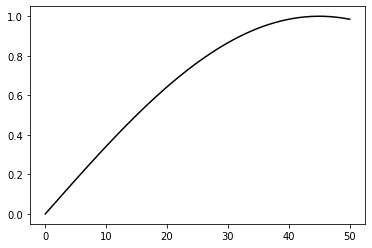

In [9]:
thlst = np.linspace(0,50,200) # [deg]
plt.plot(thlst,sin(2*thlst*pi/180),'k-')
plt.show()

# Figure 11

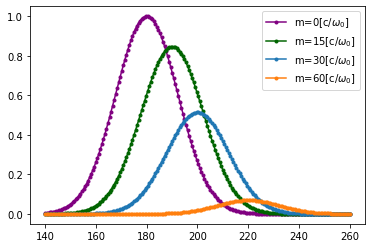

In [29]:
def b(y,m):
    """eq 25"""
    thp = pi/4 #[]
    yp = 180* 4.78/30;
    y0 = yp + m #[\mu m]
    lbdp = 0.01 #[\mu m]
    lbd0 = 1.0 #[\mu m]
    W0 = 4.78 #[\mu m]
    Wp = 4.78 #[\mu m]
    zrp = pi*Wp**2/lbdp #[\mu m]
    zr0 = pi*W0**2/lbd0 #[\mu m]
    z = 0 #[\mu m]
    def Ep(y):
        return 1/sqrt(sqrt(1+(z/zrp)**2)) * exp(-(y-yp)**2/Wp**2 / (1+(z/zrp)**2) )
    def xiE02(y):
        return 1/sqrt(1+(z/zr0)**2) * exp(-2*(y-y0)**2/W0**2 / (1+(z/zr0)**2) )
    return 6*pi**1.5 * Ep(y) * sin(2*thp) * xiE02(y)

ylst = np.linspace(140,260,200) # [c/w0], need to convert to \mu m
maxpi4 = np.max(b(ylst * 4.78/30,0))
plt.plot(ylst,b(ylst * 4.78/30, 0 * 4.78/30)/maxpi4,'.-',label=r'm=0[c/$\omega_0$]', color='purple')
plt.plot(ylst,b(ylst * 4.78/30, 15 * 4.78/30)/maxpi4,'.-',label=r'm=15[c/$\omega_0$]', color='darkgreen')
plt.plot(ylst,b(ylst * 4.78/30, 30 * 4.78/30)/maxpi4,'.-',label=r'm=30[c/$\omega_0$]', color='tab:blue')
plt.plot(ylst,b(ylst * 4.78/30, 60 * 4.78/30)/maxpi4,'.-',label=r'm=60[c/$\omega_0$]', color='tab:orange')
plt.legend()
plt.show()

# Figure 12

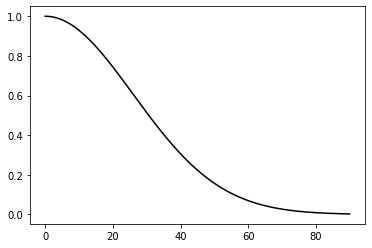

In [7]:
W0 = 4.78 #[\mu m]
Wp = 4.78 #[\mu m]
mlst = np.linspace(0,90,200) # [c/w0], need to convert to \mu m
plt.plot(mlst,exp(-2*(mlst* 4.78/30)**2/(W0**2+2*Wp**2)),'k-')
plt.show()